## importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Veri Ön işleme

### Eğitim görüntüsü Önişleme

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)#keras kütüphanesinden aldım

Found 140588 files belonging to 38 classes.


###Doğrulama Görüntüsü Ön İşleme 

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=16,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break #eğitim setimin yapısını görmek için x ve y üzerinde yineleme yapıyorum.

tf.Tensor(
[[[[ 82.    89.    82.  ]
   [ 83.    90.    83.  ]
   [ 82.25  89.25  82.25]
   ...
   [110.   116.   116.  ]
   [108.75 114.75 114.75]
   [108.75 114.75 114.75]]

  [[ 86.75  93.75  86.75]
   [ 85.    92.    85.  ]
   [ 84.    91.    84.  ]
   ...
   [107.   113.   113.  ]
   [107.   113.   113.  ]
   [109.25 115.25 115.25]]

  [[ 83.    90.    83.  ]
   [ 88.5   95.5   88.5 ]
   [ 87.75  94.75  87.75]
   ...
   [106.75 112.75 112.75]
   [106.   112.   112.  ]
   [109.   115.   115.  ]]

  ...

  [[101.75 105.75 104.75]
   [ 91.    95.    94.  ]
   [ 89.75  93.75  92.75]
   ...
   [126.25 126.25 128.25]
   [124.75 124.75 126.75]
   [126.5  126.5  128.5 ]]

  [[ 88.    92.    91.  ]
   [ 88.5   92.5   91.5 ]
   [ 96.   100.    99.  ]
   ...
   [126.5  126.5  128.5 ]
   [124.5  124.5  126.5 ]
   [125.5  125.5  127.5 ]]

  [[ 89.5   93.5   92.5 ]
   [ 93.    97.    96.  ]
   [ 93.25  97.25  96.25]
   ...
   [127.5  127.5  129.5 ]
   [123.5  123.5  125.5 ]
   [124.5  124.5  12

## Model oluşturma

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

###Evrişim Katmanı Oluşturma (Building Convolution Layer)

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))#padding=same silindi eğitim hızımızıarttırmak için
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))#aşırı uyumu önlemek için# verilerim aşırı uyum gösterdiği için 0.25 den 0.5 e yükselttim

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))#1250 den 1500 e çıkardık 

In [16]:
model.add(Dropout(0.4))#nöronların bir kısmını azalttık .0.4 den 0.5 e yükselttim.

In [17]:
#output layer
model.add(Dense(units=38,activation='softmax'))

### Modeli Derleme

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Model Eğitimi 

In [ ]:
training_history= model.fit(x=training_set,validation_data=validation_set,epochs=10)


Epoch 1/10
 398/8787 [>.............................] - ETA: 19:14 - loss: 3.2965 - accuracy: 0.1043  

### Model Evrimi 

In [20]:
#eğitim setimdeki model performansımı değerlendireceğim.
train_loss, train_acc = model.evaluate(training_set)

8787/8787 [==============================] - 380s 43ms/step - loss: 4.1881 - accuracy: 0.0281  


In [21]:
print(train_loss, train_acc)# eğitim kaybım ve eğitim doğruluğum

4.188146591186523 0.02808205597102642


In [22]:
#Modelin doğrulama veri seti üzerindeki performansı
val_loss,val_acc= model.evaluate(validation_set)

2197/2197 [==============================] - 103s 47ms/step - loss: 4.1874 - accuracy: 0.0283


In [23]:
print(val_loss,val_acc)

4.187429904937744 0.028283633291721344


### Modeli Kaydedelim

In [24]:
#her parametre içi aldığım ağırlıklar burada kaydedilecek 
#h5 dosyası olarak da kaydedebiliriz ancak daha fazla yer kaplıyor yani daha !!!!!!!!
model.save("trained_model.keras")


In [25]:
training_history.history#eğitim geçmişi olarak yazacağız burayı 

NameError: name 'training_history' is not defined

In [ ]:
#kayıt geçmişi json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

### Doğruluk görselleştirilmesi

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Eğitim Doğruluğu')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Doğrulama Doğruluğu')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Model Değerlendirmeye yönelik diğer bazı ölçümler

In [8]:
class_name = validation_set.class_names
class_name
#verisetinde kullanılan sınıfların bir listesi 

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [50]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

35144/35144 [==============================] - 471s 13ms/step


(array([[0.00725538, 0.24850893, 0.00474386, ..., 0.05210922, 0.01536833,
         0.00233789],
        [0.00725538, 0.24850893, 0.00474386, ..., 0.05210922, 0.01536833,
         0.00233789],
        [0.00504711, 0.15450065, 0.00272568, ..., 0.03476782, 0.01071792,
         0.00572596],
        ...,
        [0.01007109, 0.1559723 , 0.00461207, ..., 0.04537551, 0.01519323,
         0.00477717],
        [0.00510825, 0.23890385, 0.00264841, ..., 0.05404724, 0.00857169,
         0.00309695],
        [0.00510825, 0.23890385, 0.00264841, ..., 0.05404724, 0.00857169,
         0.00309695]], dtype=float32),
 (35144, 38))

In [51]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [52]:
predicted_categories

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1], dtype=int64)>

In [53]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(35144, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [54]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true
#tahmin edilen kategorilerimiz


<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

#hassas geri çağırma(Recall), bir modelin bir veri kümesindeki tüm ilgili vakaları bulma yeteneğidir, precision(kesinlik) ise yalnızca ilgili veri noktalarını tanımlama yeteneğidir

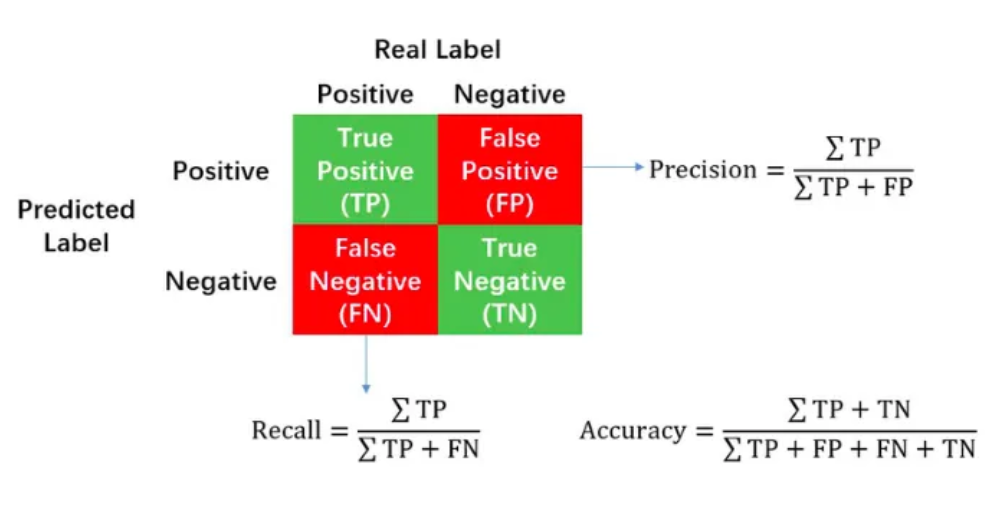

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00      1008
                                 Apple___Black_rot       0.03      1.00      0.06       994
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       880
                                   Apple___healthy       0.00      0.00      0.00      1004
                               Blueberry___healthy       0.00      0.00      0.00       908
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       842
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       820
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       954
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

C:\Users\aysen\.conda\envs\tensorflow_ort\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aysen\.conda\envs\tensorflow_ort\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aysen\.conda\envs\tensorflow_ort\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
